# Table of Contents
1. Data Warehousing fundamentals  
2. What is a Data Warehouse?  
3. Bill Inmon’s Definition  
4. What is ETL?  
5. ETL Techniques  
6. Slowly Changing Dimensions (SCD) — Types 0–3  
7. Big Data overview  
8. Hadoop overview  
9. Spark Overview  
10. Dataproc Overview  
11. Warehouse vs Data Lake vs Lakehouse  
12. Spark as Lakehouse compute (Parquet rationale)  
13. Medallion architecture as a data design pattern  
14. Bronze: ingest raw data  
15. Build Silver tables from the Bronze layer  
16. Gold: power analytics with business‑ready facts & dimensions  
17. Glossary of terms



## 1) Data Warehousing fundamentals
A **Data Warehouse (DW)** is the enterprise’s authoritative analytical store—integrated, historical, and optimized for **read‑heavy** access such as dashboards, ad‑hoc SQL, and regulatory reporting.

**Principles**
- **Subject‑oriented** — organized by business entities (customers, products, sales).  
- **Integrated** — consistent semantics across sources.  
- **Time‑variant** — retains history for as‑of analysis and trends.  
- **Non‑volatile** — predictable writes; stable, high‑performance reads.

**Why teams invest**
- Single source of truth for KPIs.  
- Faster, self‑service analytics from modeled data.  
- Governance, lineage, and auditability.


## 2) What is a Data Warehouse?
A curated analytical repository modeled for BI. **Fact tables** capture measurements at a defined grain (e.g., order line) and link to **dimensions** that hold descriptive attributes. Common designs include **star** and **snowflake** schemas with surrogate keys and conformed dimensions.


## 3) Bill Inmon’s Definition
> “A **subject‑oriented, integrated, time‑variant, non‑volatile** collection of data in support of management’s decision‑making process.”

**Design implications**
- Organize around business entities (`dim_customer`, `dim_product`, `fact_sales`).  
- Define and enforce **shared semantics** and **data contracts**.  
- Preserve **history** via effective dating or snapshots.  
- Prioritize **governance, lineage, and auditability**.


## 4) What is ETL?
**ETL** = **Extract** from operational systems → **Transform** (cleanse, standardize, integrate, enrich) → **Load** into analytical models.  
Modern stacks often adopt **ELT**—load first and transform in the analytics engine—but the objective is unchanged: **trustworthy, performant** data.


## 5) ETL Techniques
**Extraction**
- Full vs incremental loads, including **change‑data capture** when available.  
- Batch, micro‑batch, or streaming based on freshness needs.

**Transformation**
- Type/format standardization, text normalization, deduplication.  
- Joins to reference data, derived columns, and **quality gates** (domain checks, foreign‑key integrity, thresholds).  
- Manage schema evolution and quarantine out‑of‑contract records.

**Loading**
- Upsert/merge strategies for mutable entities.  
- Partitioning and clustering for query performance and cost control.  
- Idempotent, observable pipelines with SLAs.


## 6) Slowly Changing Dimensions (SCD)
**Goal:** keep analytics correct when descriptive attributes change (e.g., marital status or product category).

- **Type 0 — Retain original:** do not alter once written.  
- **Type 1 — Overwrite:** store only the latest value (no history).  
- **Type 2 — Versioned rows:** add a new record with `valid_from`, `valid_to`, and a current‑row flag to preserve history.  
- **Type 3 — Limited history in columns:** keep a small number of prior values (e.g., `prev_category`).

**Practices**: surrogate keys in dimensions and **as‑of** joins for historical analysis.


## 7) Big Data overview
When volume, velocity, and variety outgrow a single server, we use **distributed storage and compute** with strong governance.

**Components**
- Storage: object storage / distributed files with **columnar** formats.  
- Compute: parallel engines for batch, streaming, and SQL.  
- Ingestion: pipelines from databases, files, and events/CDC.  
- Serving: SQL endpoints, BI semantic layers, ML features, and APIs.  
- Governance: catalogs, access control, lineage, quality monitoring.


## 8) Hadoop overview
- **HDFS** — distributed, fault‑tolerant storage with replication.  
- **MapReduce** — batch compute paradigm (map → shuffle → reduce).  
- **YARN** — resource manager for cluster scheduling.

These concepts underlie modern lakehouse platforms even as many teams favor object storage with engines like Spark.


## 9) Spark Overview
A unified engine for **SQL**, **batch**, and **streaming** with advanced optimization and memory management. It runs on multiple resource managers and integrates with catalogs to access governed tables.


## 10) Dataproc Overview
A managed cloud service that provisions on‑demand clusters for open‑source data frameworks. It simplifies scaling, job submission, monitoring, and integrates with object storage and IAM—ideal for **ephemeral, cost‑controlled** analytics work.


## 11) Warehouse vs Data Lake vs Lakehouse
| Aspect        | Data Warehouse                         | Data Lake                                | Lakehouse                                        |
|---------------|----------------------------------------|-------------------------------------------|--------------------------------------------------|
| Schema        | Schema‑on‑write (curated models)       | Schema‑on‑read (raw/varied)               | Schema‑on‑read **and** write                     |
| Storage       | Proprietary tables                     | Object storage (files)                    | Object storage + **ACID** table format           |
| Transactions  | Strong                                 | Weak/none                                 | **ACID** guarantees for reliability              |
| Performance   | High; indexes & caching                | Engine‑dependent                          | High; skipping, caching, clustering              |
| Governance    | Centralized and mature                 | Emerging tools                            | Centralized with open catalogs                   |
| Latency       | Batch / near real‑time                 | Batch / streaming via engines             | Unified **batch & streaming**                    |
| Use cases     | BI & reporting                         | Data science & discovery                  | Unified BI + DS/ML + streaming                   |
| Formats       | SQL tables                             | Parquet/CSV/JSON                          | Parquet + ACID formats (time travel, concurrency)|


## 12) Spark as Lakehouse compute (Parquet rationale)
Spark provides the **compute** to transform, query, and stream data stored in open formats on object storage and governed by a catalog + ACID tables.

**Why Parquet for storage**
- **Columnar layout** → read only needed columns.  
- **Compression & encoding** → reduced IO and cost.  
- **Predicate pushdown & statistics** → skip irrelevant row groups.  
- **Schema evolution** → add columns safely.  
- **Interoperability** → broadly supported across engines and clouds.

ACID table layers sit atop Parquet to add **transactions, concurrency, and time travel** for reliable analytics.


## 13) Medallion architecture as a data design pattern
A layered approach where **data quality and structure increase** across **Bronze → Silver → Gold**:
- **Bronze**: raw, append‑only, minimal shaping for traceability.  
- **Silver**: standardized, deduplicated, integrated; SCD handling where attributes change.  
- **Gold**: business‑ready facts & dimensions aligned to KPIs and SLAs.

This promotes progressive refinement, clear quality gates, and reusable conformed datasets.


## 14) Bronze: ingest raw data
**Purpose:** capture original fidelity for traceability and debugging.

**Datasets (conceptual view)**
- Sales details — line‑level transactions (timestamps, quantities, amounts).  
- Customer master — identifiers, names, demographics.  
- Product master — identifiers and descriptions.  
- Cross‑system references — customers, locations, prices/categories.

**Practices**
- Append‑only loads with provenance (ingest time, source).  
- Partition by ingestion date; avoid in‑place corrections—ingest improved versions.

### Lineage visual


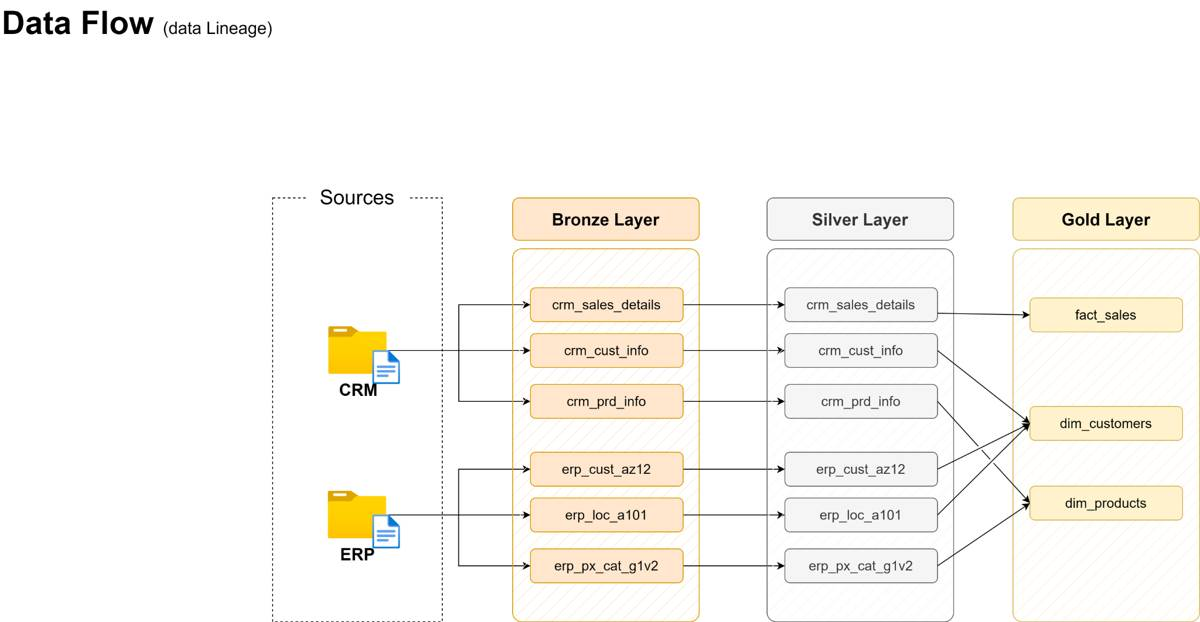

## 15) Build Silver tables from the Bronze layer
**Goal:** produce **clean, standardized, conformed** datasets ready for analytics.

**What changes here**
- **Standardization:** types, formats, text cleanup; unify enumerations (e.g., gender, marital status).  
- **Deduplication:** keep the latest valid record per natural key.  
- **Integration:** map cross‑system identifiers and enrich with references (customer → location; product → category/price).  
- **SCD (0–3):** maintain history where needed (Type 2) or limited prior values (Type 3).  
- **Validation:** domain checks, foreign‑key integrity, null thresholds, anomaly flags.

### Data‑layers visual


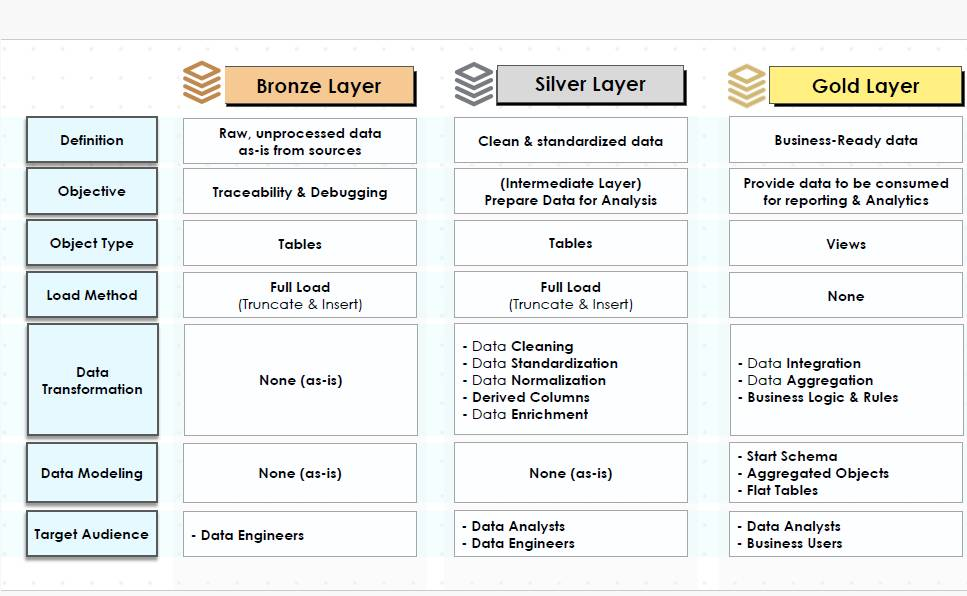

## 16) Gold: power analytics with business‑ready facts & dimensions
**Purpose:** serve **read‑optimized** models aligned to business KPIs and decisions.

**Final model highlights (conceptual)**
- **Sales fact** (order‑line grain): links to **product** and **customer** via surrogate keys; measures include **quantity**, **price**, and **sales amount** (commonly `quantity × price`).  
- **Customer dimension:** surrogate key; stable business identifiers; demographics such as **marital status**, **gender**, **birthdate**, **country**; designed for SCD where appropriate.  
- **Product dimension:** surrogate key; business identifiers & descriptors; **category / subcategory**, **product line**, **maintenance flag**, **cost**, and effective dating where required.

These models minimize joins for dashboards while remaining traceable back to Silver and Bronze.

### Visual — final dimensional schema


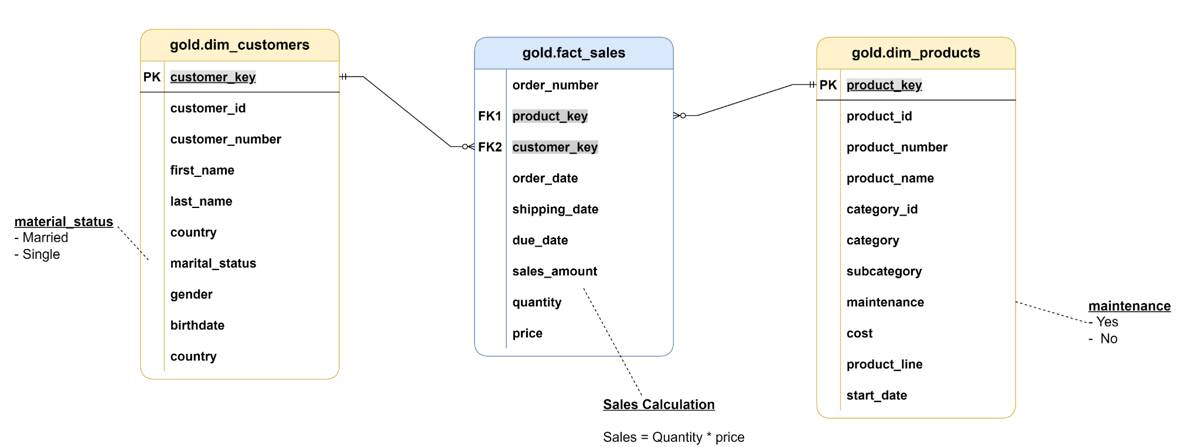

## 17) Glossary of terms
- **Sources** — Upstream operational systems and external feeds.  
- **Ingestion** — Bringing data into the platform via batch, streaming, or CDC.  
- **Data Warehouse** — Curated analytical store for BI; integrates, historicizes, and governs data.  
- **Data Lake** — Object‑storage repository for raw/varied data; schema often applied on read.  
- **Lakehouse** — Combines lake economics with warehouse reliability via **ACID tables** and catalogs.  
- **Catalog / Metastore** — Registry of tables, schemas, permissions, and lineage.  
- **Bronze / Silver / Gold** — Medallion layers: raw → refined → serving.  
- **Fact Table** — Measurements at a specific grain (e.g., order line) linked to dimensions.  
- **Dimension Table** — Descriptive attributes (e.g., product, customer), often SCD‑enabled.  
- **Surrogate Key** — Synthetic, stable identifier used in dimensional joins.  
- **SCD ** — Methods for preserving attribute changes: retain, overwrite, versioned rows, limited prior values.  
- **Star Schema** — A fact surrounded by conformed dimensions.  
- **ETL / ELT** — Extract‑Transform‑Load vs Extract‑Load‑Transform (in‑engine).  
- **Parquet** — Columnar file format with compression and predicate pushdown; common storage layer in lakes/lakehouses.  
- **Predicate Pushdown** — Skipping non‑matching data at read time based on filters.  
- **HDFS / MapReduce / YARN** — Core components of the Hadoop ecosystem for storage, compute, and resource management.  
- **Spark** — Unified compute engine for large‑scale SQL, batch, and streaming.  
- **Dataproc** — Managed service for provisioning open‑source data clusters in the cloud.  
- **Quality Gate** — Automated checks (schema, null %, referential integrity) required for promotion.  
- **Lineage** — End‑to‑end trace of data’s origin and transformations.  
- **BI & Reporting** — Dashboards and standard reports for decision‑makers.
